**Introduction**:
The data I picked is "2023 Respiratory Virus Response - NSSP Emergency Department Visits - COVID-19, Flu, RSV, Combined - by Demographic Category" which is release and updated every friday by The "U.S. Department of Health & Human Services". The data was taken from the link:
https://catalog.data.gov/dataset/2023-respiratory-virus-response-nssp-emergency-department-visits-covid-19-flu-rsv-combined-91954
Since covid started, every emergency patient is to be claimed to have covid which is one of the respiratory viruses, so I am intersted to see what is the proportion of thoses emergency visits are covid.

**Data Exploration**:



In [6]:
# Importing pandas
import pandas as pd

# Loading the data into ipynb
resp_viruses = pd.read_csv('https://raw.githubusercontent.com/SalouaDaouki/Data602/main/2023_Respiratory_Virus_Response.csv')

# Convert the data to dataframe
pd.DataFrame(resp_viruses)

# Display the first 10 rows of the data
resp_viruses.head(10)

,week_end,geography,pathogen,demographics_type,demographics_values,percent_visits
0,2023-07-15,United States,COVID-19,Age Group,0-4 years,1.1
1,2023-07-15,United States,COVID-19,Age Group,5-17 years,0.3
2,2023-07-15,United States,COVID-19,Age Group,18-64 years,0.6
3,2023-07-15,United States,COVID-19,Age Group,65+ years,1.0
4,2023-02-25,United States,COVID-19,Age Group,0-4 years,1.9
5,2023-02-25,United States,COVID-19,Age Group,5-17 years,0.7
6,2023-02-25,United States,COVID-19,Age Group,18-64 years,1.4
7,2023-02-25,United States,COVID-19,Age Group,65+ years,2.9
8,2023-07-29,United States,COVID-19,Age Group,0-4 years,1.9
9,2023-07-29,United States,COVID-19,Age Group,5-17 years,0.6


In [10]:
# Display the last 10 rows of the data
resp_viruses.tail(10)

,week_end,geography,pathogen,demographics_type,demographics_values,percent_visits
2486,2022-10-22,United States,RSV,Sex,Female,0.7
2487,2022-10-22,United States,RSV,Sex,Male,1.0
2488,2023-08-12,United States,RSV,Sex,Female,0.0
2489,2023-08-12,United States,RSV,Sex,Male,0.0
2490,2023-03-18,United States,RSV,Sex,Female,0.0
2491,2023-03-18,United States,RSV,Sex,Male,0.1
2492,2023-10-07,United States,RSV,Sex,Female,0.2
2493,2023-10-07,United States,RSV,Sex,Male,0.3
2494,2022-12-31,United States,RSV,Sex,Female,0.4
2495,2022-12-31,United States,RSV,Sex,Male,0.4


In [7]:
# Summary of the data
resp_viruses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496 entries, 0 to 2495
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   week_end             2496 non-null   object 
 1   geography            2496 non-null   object 
 2   pathogen             2496 non-null   object 
 3   demographics_type    2496 non-null   object 
 4   demographics_values  2496 non-null   object 
 5   percent_visits       2496 non-null   float64
dtypes: float64(1), object(5)
memory usage: 117.1+ KB


In [8]:
# Display the basic statistical details of the DataFrame
resp_viruses.describe()

,percent_visits
count,2496.000000
mean,1.704687
std,2.449571
min,0.000000
25%,0.300000
50%,0.900000
75%,2.100000
max,20.400000


In [9]:
# Check for missing values
resp_viruses.isnull().sum()

week_end               0
geography              0
pathogen               0
demographics_type      0
demographics_values    0
percent_visits         0
dtype: int64

There are 2496 entries and the count is 2496, which means that there is no missing value. This also was confirmed with .isnull() method.

**Data Wrangling**:

In [20]:
# (question10) Getting all values of the column demographics_type
demo_type = resp_viruses.loc[:,'demographics_type']
print(demo_type)

0       Age Group
1       Age Group
2       Age Group
3       Age Group
4       Age Group
          ...    
2491          Sex
2492          Sex
2493          Sex
2494          Sex
2495          Sex
Name: demographics_type, Length: 2496, dtype: object


In [34]:
# subsetting the data baed on the Age Group
resp_viruses_age = resp_viruses[resp_viruses["demographics_type"] == "Age Group"]
resp_viruses_age

,week_end,geography,pathogen,demographics_type,demographics_values,percent_visits
0,2023-07-15,United States,COVID-19,Age Group,0-4 years,1.1
1,2023-07-15,United States,COVID-19,Age Group,5-17 years,0.3
2,2023-07-15,United States,COVID-19,Age Group,18-64 years,0.6
3,2023-07-15,United States,COVID-19,Age Group,65+ years,1.0
4,2023-02-25,United States,COVID-19,Age Group,0-4 years,1.9
...,...,...,...,...,...,...
827,2023-10-07,United States,RSV,Age Group,65+ years,0.0
828,2022-12-31,United States,RSV,Age Group,0-4 years,3.2
829,2022-12-31,United States,RSV,Age Group,5-17 years,0.2
830,2022-12-31,United States,RSV,Age Group,18-64 years,0.1


In [21]:
# (question5) Removing the demographics_type column form resp_viruses_age data
resp_viruses_ageNew = resp_viruses_age.drop(columns = ['demographics_type'])
resp_viruses_ageNew

,week_end,geography,pathogen,demographics_values,percent_visits
0,2023-07-15,United States,COVID-19,0-4 years,1.1
1,2023-07-15,United States,COVID-19,5-17 years,0.3
2,2023-07-15,United States,COVID-19,18-64 years,0.6
3,2023-07-15,United States,COVID-19,65+ years,1.0
4,2023-02-25,United States,COVID-19,0-4 years,1.9
...,...,...,...,...,...
827,2023-10-07,United States,RSV,65+ years,0.0
828,2022-12-31,United States,RSV,0-4 years,3.2
829,2022-12-31,United States,RSV,5-17 years,0.2
830,2022-12-31,United States,RSV,18-64 years,0.1


In [24]:
# (question1) Rename demographics_values column to age
resp_viruses_ageNew.rename(columns={'demographics_values': 'Age'}, inplace=True)
resp_viruses_ageNew.rename(columns={'pathogen': 'Virus'}, inplace=True)
resp_viruses_ageNew

,week_end,geography,Virus,Age,percent_visits
0,2023-07-15,United States,COVID-19,0-4 years,1.1
1,2023-07-15,United States,COVID-19,5-17 years,0.3
2,2023-07-15,United States,COVID-19,18-64 years,0.6
3,2023-07-15,United States,COVID-19,65+ years,1.0
4,2023-02-25,United States,COVID-19,0-4 years,1.9
...,...,...,...,...,...
827,2023-10-07,United States,RSV,65+ years,0.0
828,2022-12-31,United States,RSV,0-4 years,3.2
829,2022-12-31,United States,RSV,5-17 years,0.2
830,2022-12-31,United States,RSV,18-64 years,0.1


In [25]:
# (question7) Sorting the data based on Age column
resp_viruses_ageNew.sort_values('Age')

,week_end,geography,Virus,Age,percent_visits
0,2023-07-15,United States,COVID-19,0-4 years,1.1
744,2023-09-02,United States,RSV,0-4 years,0.8
340,2022-11-19,United States,Combined,0-4 years,17.6
336,2023-09-23,United States,Combined,0-4 years,4.7
328,2023-09-02,United States,Combined,0-4 years,5.2
...,...,...,...,...,...
431,2023-06-24,United States,Influenza,65+ years,0.1
427,2023-07-29,United States,Influenza,65+ years,0.1
423,2023-02-25,United States,Influenza,65+ years,0.2
411,2023-10-07,United States,Combined,65+ years,2.7


In [32]:
# (question4) adding a column to calculate the sum of percent visits based on the age
c = resp_viruses_ageNew["percent_visits"].cumsum()
resp_viruses_ageNew['Cum_0-4'] = c.mask(resp_viruses_ageNew["Age"] != "0-4 years").ffill()
resp_viruses_ageNew['Cum_5-17'] = c.mask(resp_viruses_ageNew["Age"] != "5-17 years").ffill()
resp_viruses_ageNew['Cum_18-64'] = c.mask(resp_viruses_ageNew["Age"] != "18-64 years").ffill()
resp_viruses_ageNew['Cum_65+'] = c.mask(resp_viruses_ageNew["Age"] != "65+ years").ffill()
resp_viruses_ageNew

,week_end,geography,Virus,Age,percent_visits,Cum_0-4,Cum_5-17,Cum_18-64,Cum_65+
0,2023-07-15,United States,COVID-19,0-4 years,1.1,1.1,NaN,NaN,NaN
1,2023-07-15,United States,COVID-19,5-17 years,0.3,1.1,1.4,NaN,NaN
2,2023-07-15,United States,COVID-19,18-64 years,0.6,1.1,1.4,2.0,NaN
3,2023-07-15,United States,COVID-19,65+ years,1.0,1.1,1.4,2.0,3.0
4,2023-02-25,United States,COVID-19,0-4 years,1.9,4.9,1.4,2.0,3.0
...,...,...,...,...,...,...,...,...,...
827,2023-10-07,United States,RSV,65+ years,0.0,1616.0,1616.2,1616.2,1616.2
828,2022-12-31,United States,RSV,0-4 years,3.2,1619.4,1616.2,1616.2,1616.2
829,2022-12-31,United States,RSV,5-17 years,0.2,1619.4,1619.6,1616.2,1616.2
830,2022-12-31,United States,RSV,18-64 years,0.1,1619.4,1619.6,1619.7,1616.2


In [33]:
# (question7) Sorting the data, 2nd time, based on Age column
resp_viruses_ageNew.sort_values('Age')

,week_end,geography,Virus,Age,percent_visits,Cum_0-4,Cum_5-17,Cum_18-64,Cum_65+
0,2023-07-15,United States,COVID-19,0-4 years,1.1,1.1,NaN,NaN,NaN
744,2023-09-02,United States,RSV,0-4 years,0.8,1553.1,1551.9,1552.0,1552.3
340,2022-11-19,United States,Combined,0-4 years,17.6,816.2,793.8,795.5,798.6
336,2023-09-23,United States,Combined,0-4 years,4.7,792.0,785.7,786.3,787.3
328,2023-09-02,United States,Combined,0-4 years,5.2,775.0,761.4,765.4,769.8
...,...,...,...,...,...,...,...,...,...
431,2023-06-24,United States,Influenza,65+ years,0.1,1152.1,1152.5,1152.7,1152.8
427,2023-07-29,United States,Influenza,65+ years,0.1,1151.1,1151.4,1151.5,1151.6
423,2023-02-25,United States,Influenza,65+ years,0.2,1149.4,1150.1,1150.4,1150.6
411,2023-10-07,United States,Combined,65+ years,2.7,1104.1,1106.0,1107.4,1110.1


In [35]:
# (question8) creating another subset of the original data by gender
resp_viruses_gender = resp_viruses[resp_viruses["demographics_type"] == "Sex"]
resp_viruses_gender

,week_end,geography,pathogen,demographics_type,demographics_values,percent_visits
2080,2023-07-15,United States,COVID-19,Sex,Female,0.7
2081,2023-07-15,United States,COVID-19,Sex,Male,0.6
2082,2023-02-25,United States,COVID-19,Sex,Female,1.8
2083,2023-02-25,United States,COVID-19,Sex,Male,1.7
2084,2023-07-29,United States,COVID-19,Sex,Female,1.1
...,...,...,...,...,...,...
2491,2023-03-18,United States,RSV,Sex,Male,0.1
2492,2023-10-07,United States,RSV,Sex,Female,0.2
2493,2023-10-07,United States,RSV,Sex,Male,0.3
2494,2022-12-31,United States,RSV,Sex,Female,0.4


In [36]:
# (question5) Removing the demographics_type column form resp_viruses_gender data
resp_viruses_genderNew = resp_viruses_gender.drop(columns = ['demographics_type'])
resp_viruses_genderNew

,week_end,geography,pathogen,demographics_values,percent_visits
2080,2023-07-15,United States,COVID-19,Female,0.7
2081,2023-07-15,United States,COVID-19,Male,0.6
2082,2023-02-25,United States,COVID-19,Female,1.8
2083,2023-02-25,United States,COVID-19,Male,1.7
2084,2023-07-29,United States,COVID-19,Female,1.1
...,...,...,...,...,...
2491,2023-03-18,United States,RSV,Male,0.1
2492,2023-10-07,United States,RSV,Female,0.2
2493,2023-10-07,United States,RSV,Male,0.3
2494,2022-12-31,United States,RSV,Female,0.4


In [37]:
# (question1) Rename demographics_values column to age
resp_viruses_genderNew.rename(columns={'demographics_values': 'Gender'}, inplace=True)
resp_viruses_genderNew

,week_end,geography,pathogen,Gender,percent_visits
2080,2023-07-15,United States,COVID-19,Female,0.7
2081,2023-07-15,United States,COVID-19,Male,0.6
2082,2023-02-25,United States,COVID-19,Female,1.8
2083,2023-02-25,United States,COVID-19,Male,1.7
2084,2023-07-29,United States,COVID-19,Female,1.1
...,...,...,...,...,...
2491,2023-03-18,United States,RSV,Male,0.1
2492,2023-10-07,United States,RSV,Female,0.2
2493,2023-10-07,United States,RSV,Male,0.3
2494,2022-12-31,United States,RSV,Female,0.4


In [38]:
# filttering the data by gender
Resp_viruses_female = resp_viruses_genderNew[resp_viruses_genderNew["Gender"]=="Female"]
Resp_viruses_female

,week_end,geography,pathogen,Gender,percent_visits
2080,2023-07-15,United States,COVID-19,Female,0.7
2082,2023-02-25,United States,COVID-19,Female,1.8
2084,2023-07-29,United States,COVID-19,Female,1.1
2086,2023-06-24,United States,COVID-19,Female,0.5
2088,2023-03-04,United States,COVID-19,Female,1.6
...,...,...,...,...,...
2486,2022-10-22,United States,RSV,Female,0.7
2488,2023-08-12,United States,RSV,Female,0.0
2490,2023-03-18,United States,RSV,Female,0.0
2492,2023-10-07,United States,RSV,Female,0.2


In [39]:
# filttering the data by gender
Resp_viruses_male = resp_viruses_genderNew[resp_viruses_genderNew["Gender"]=="Male"]
Resp_viruses_male

,week_end,geography,pathogen,Gender,percent_visits
2081,2023-07-15,United States,COVID-19,Male,0.6
2083,2023-02-25,United States,COVID-19,Male,1.7
2085,2023-07-29,United States,COVID-19,Male,0.9
2087,2023-06-24,United States,COVID-19,Male,0.5
2089,2023-03-04,United States,COVID-19,Male,1.5
...,...,...,...,...,...
2487,2022-10-22,United States,RSV,Male,1.0
2489,2023-08-12,United States,RSV,Male,0.0
2491,2023-03-18,United States,RSV,Male,0.1
2493,2023-10-07,United States,RSV,Male,0.3


In [49]:
# Merge female and male DataFrames on a common column
merged_data = pd.merge(Resp_viruses_female, Resp_viruses_male, on='pathogen')
merged_data

,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y
0,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-15,United States,Male,0.6
1,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-02-25,United States,Male,1.7
2,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-29,United States,Male,0.9
3,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-06-24,United States,Male,0.5
4,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-03-04,United States,Male,1.5
...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,United States,RSV,Female,0.4,NaN,2022-10-22,United States,Male,1.0
10812,2022-12-31,United States,RSV,Female,0.4,NaN,2023-08-12,United States,Male,0.0
10813,2022-12-31,United States,RSV,Female,0.4,NaN,2023-03-18,United States,Male,0.1
10814,2022-12-31,United States,RSV,Female,0.4,NaN,2023-10-07,United States,Male,0.3


In [51]:
merged_data.drop(columns = ['Male_percent'])
merged_data

,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y
0,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-15,United States,Male,0.6
1,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-02-25,United States,Male,1.7
2,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-29,United States,Male,0.9
3,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-06-24,United States,Male,0.5
4,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-03-04,United States,Male,1.5
...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,United States,RSV,Female,0.4,NaN,2022-10-22,United States,Male,1.0
10812,2022-12-31,United States,RSV,Female,0.4,NaN,2023-08-12,United States,Male,0.0
10813,2022-12-31,United States,RSV,Female,0.4,NaN,2023-03-18,United States,Male,0.1
10814,2022-12-31,United States,RSV,Female,0.4,NaN,2023-10-07,United States,Male,0.3


In [54]:
# comparing the difference of the percent visits between males and females
merged_data['percent_diff'] = merged_data['percent_visits_x'] - merged_data['percent_visits_y']
merged_data

,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y,percent_diff
0,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-15,United States,Male,0.6,0.1
1,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-02-25,United States,Male,1.7,-1.0
2,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-07-29,United States,Male,0.9,-0.2
3,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-06-24,United States,Male,0.5,0.2
4,2023-07-15,United States,COVID-19,Female,0.7,NaN,2023-03-04,United States,Male,1.5,-0.8
...,...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,United States,RSV,Female,0.4,NaN,2022-10-22,United States,Male,1.0,-0.6
10812,2022-12-31,United States,RSV,Female,0.4,NaN,2023-08-12,United States,Male,0.0,0.4
10813,2022-12-31,United States,RSV,Female,0.4,NaN,2023-03-18,United States,Male,0.1,0.3
10814,2022-12-31,United States,RSV,Female,0.4,NaN,2023-10-07,United States,Male,0.3,0.1


In [61]:
# (question6) Drop rows with PATHOGEN OF COVID-19
merged_data_cleaned = merged_data[merged_data.pathogen != 'COVID-19']
merged_data_cleaned

,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y,percent_diff
2704,2023-07-15,United States,Combined,Female,0.9,NaN,2023-07-15,United States,Male,0.8,0.1
2705,2023-07-15,United States,Combined,Female,0.9,NaN,2023-02-25,United States,Male,2.1,-1.2
2706,2023-07-15,United States,Combined,Female,0.9,NaN,2023-07-29,United States,Male,1.1,-0.2
2707,2023-07-15,United States,Combined,Female,0.9,NaN,2023-06-24,United States,Male,0.7,0.2
2708,2023-07-15,United States,Combined,Female,0.9,NaN,2023-03-04,United States,Male,1.8,-0.9
...,...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,United States,RSV,Female,0.4,NaN,2022-10-22,United States,Male,1.0,-0.6
10812,2022-12-31,United States,RSV,Female,0.4,NaN,2023-08-12,United States,Male,0.0,0.4
10813,2022-12-31,United States,RSV,Female,0.4,NaN,2023-03-18,United States,Male,0.1,0.3
10814,2022-12-31,United States,RSV,Female,0.4,NaN,2023-10-07,United States,Male,0.3,0.1


In [64]:
# Sorting the data based on data and percent visits for males and females
merged_data_cleaned.sort_values(['week_end_x', 'percent_visits_x', 'week_end_y','percent_visits_y'])

,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y,percent_diff
10603,2022-10-22,United States,RSV,Female,0.7,NaN,2022-10-22,United States,Male,1.0,-0.3
10601,2022-10-22,United States,RSV,Female,0.7,NaN,2022-10-29,United States,Male,1.2,-0.5
10599,2022-10-22,United States,RSV,Female,0.7,NaN,2022-11-05,United States,Male,1.3,-0.6
10585,2022-10-22,United States,RSV,Female,0.7,NaN,2022-11-12,United States,Male,1.4,-0.7
10589,2022-10-22,United States,RSV,Female,0.7,NaN,2022-11-19,United States,Male,1.3,-0.6
...,...,...,...,...,...,...,...,...,...,...,...
4880,2023-10-14,United States,Combined,Female,2.0,NaN,2023-09-16,United States,Male,2.2,-0.2
4868,2023-10-14,United States,Combined,Female,2.0,NaN,2023-09-23,United States,Male,2.2,-0.2
4853,2023-10-14,United States,Combined,Female,2.0,NaN,2023-09-30,United States,Male,2.1,-0.1
4886,2023-10-14,United States,Combined,Female,2.0,NaN,2023-10-07,United States,Male,2.0,0.0


In [67]:
# (question9) convert geography column to upper case
merged_data_cleaned['geography_x'] = merged_data_cleaned['geography_x'].str.upper()
merged_data_cleaned['geography_y'] = merged_data_cleaned['geography_y'].str.upper()
merged_data_cleaned

<ipython-input-67-3e84a3431e96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['geography_x'] = merged_data_cleaned['geography_x'].str.upper()
<ipython-input-67-3e84a3431e96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['geography_y'] = merged_data_cleaned['geography_y'].str.upper()


,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y,percent_diff
2704,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-07-15,UNITED STATES,Male,0.8,0.1
2705,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-02-25,UNITED STATES,Male,2.1,-1.2
2706,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-07-29,UNITED STATES,Male,1.1,-0.2
2707,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-06-24,UNITED STATES,Male,0.7,0.2
2708,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-03-04,UNITED STATES,Male,1.8,-0.9
...,...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2022-10-22,UNITED STATES,Male,1.0,-0.6
10812,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-08-12,UNITED STATES,Male,0.0,0.4
10813,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-03-18,UNITED STATES,Male,0.1,0.3
10814,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-10-07,UNITED STATES,Male,0.3,0.1


In [70]:
# (question11) multiply the percent visits by 100
merged_data_cleaned['percent_visitsx100'] = merged_data_cleaned['percent_visits_x'].apply(lambda x: x * 100)
merged_data_cleaned['percent_visitsy100'] = merged_data_cleaned['percent_visits_y'].apply(lambda x: x * 100)
merged_data_cleaned

<ipython-input-70-d42e69a0eea9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['percent_visitsx100'] = merged_data_cleaned['percent_visits_x'].apply(lambda x: x * 100)
<ipython-input-70-d42e69a0eea9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_cleaned['percent_visitsy100'] = merged_data_cleaned['percent_visits_y'].apply(lambda x: x * 100)


,week_end_x,geography_x,pathogen,Gender_x,percent_visits_x,Male_percent,week_end_y,geography_y,Gender_y,percent_visits_y,percent_diff,percent_visitsx100,percent_visitsy100
2704,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-07-15,UNITED STATES,Male,0.8,0.1,90.0,80.0
2705,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-02-25,UNITED STATES,Male,2.1,-1.2,90.0,210.0
2706,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-07-29,UNITED STATES,Male,1.1,-0.2,90.0,110.0
2707,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-06-24,UNITED STATES,Male,0.7,0.2,90.0,70.0
2708,2023-07-15,UNITED STATES,Combined,Female,0.9,NaN,2023-03-04,UNITED STATES,Male,1.8,-0.9,90.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10811,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2022-10-22,UNITED STATES,Male,1.0,-0.6,40.0,100.0
10812,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-08-12,UNITED STATES,Male,0.0,0.4,40.0,0.0
10813,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-03-18,UNITED STATES,Male,0.1,0.3,40.0,10.0
10814,2022-12-31,UNITED STATES,RSV,Female,0.4,NaN,2023-10-07,UNITED STATES,Male,0.3,0.1,40.0,30.0


In [77]:
# (question11) group the data by percent and calculate the mean
grouped_data_female = Resp_viruses_female.groupby('percent_visits').mean()
grouped_data_female

<ipython-input-77-a94e22cc3722>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_female = Resp_viruses_female.groupby('percent_visits').mean()


,Male_percent
percent_visits,
0.0,NaN
0.1,NaN
0.2,NaN
0.3,NaN
0.4,NaN
0.5,NaN
0.6,NaN
0.7,NaN
0.8,NaN


In [78]:
grouped_data_male = Resp_viruses_male.groupby('percent_visits').mean()
grouped_data_male

<ipython-input-78-c213bd2f4845>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_male = Resp_viruses_male.groupby('percent_visits').mean()


""
percent_visits
0.0
0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8


In [80]:
# (question12) grouping and merging the data by gender and the virus and adding the sum of percent visits
df_agg = resp_viruses_genderNew.groupby(['Gender','pathogen']).agg({'percent_visits':sum})
result = df_agg['percent_visits'].groupby(level=0, group_keys=False)
print(result.nlargest())

Gender  pathogen 
Female  Combined     156.6
        COVID-19      85.9
        Influenza     62.0
        RSV           10.5
Male    Combined     152.5
        COVID-19      78.1
        Influenza     62.3
        RSV           13.8
Name: percent_visits, dtype: float64


Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: percent_visits, dtype: object

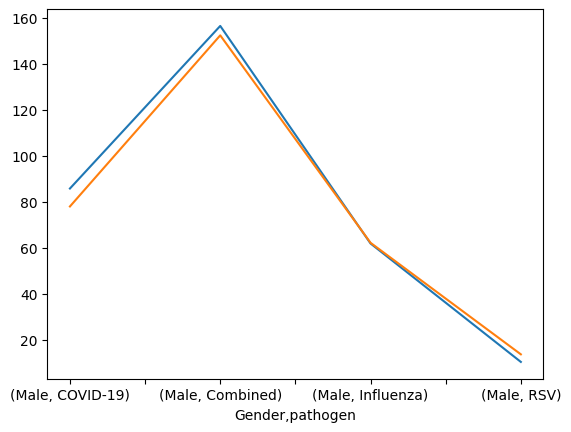

In [82]:
# plot the reults from previous
import matplotlib.pyplot as plt
result.plot()

**Conclusion**

This data set is not that"dirty", but I was able to explore and practice more with different methods that pandas can offer. I would like to visualize the data in a plot, so my next step is to learn and play around with different methods to create a plot.
I tried to plot the last data since it it the smallest data of all, but I would like to explore more on that.